## Decision Trees and Random Forests 

Adapted from the excerpts from the Python Data Science Handbook by Jake VanderPlas

In [45]:
%%file helpers_05_08.py

# This creates a module helpers_05_08.py which contains some tools used in In-Depth: Decision Trees and Random Forests. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    print(estimator.score(X,y)) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);

Overwriting helpers_05_08.py


In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

#### Generating random two-dimensional data for classification: 

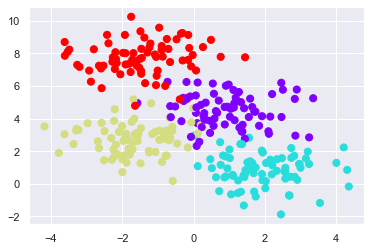

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

#### Classification with a single decision tree with parameters {entropy quality criterion, no maximal depth}: 

Mean classification accuracy = 1.0


C:\Users\gorja\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'clim'


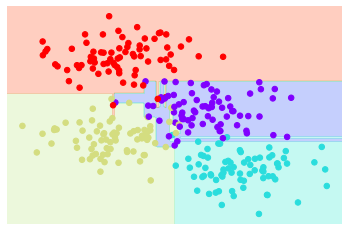

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy").fit(X, y)
print("Mean classification accuracy =", tree.score(X,y))
visualize_classifier(DecisionTreeClassifier(), X, y)

Problems arise in the middle of the feature space, where points of different classes 

#### Classification of two-dimensional data with trees with different depths (notice the overfitting): 

C:\Users\gorja\Google Drive\Fakultet\ASI\MU\Kod\8 - Ensemble Methods\helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
C:\Users\gorja\Google Drive\Fakultet\ASI\MU\Kod\8 - Ensemble Methods\helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
C:\Users\gorja\Google Drive\Fakultet\ASI\MU\Kod\8 - Ensemble Methods\helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
C:\Users\gorja\Google Drive\Fakultet\ASI\MU\Kod\8 - Ensemble Methods\helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)


Mean classification accuracy = 0.4766666666666667
Mean classification accuracy = 0.71
Mean classification accuracy = 0.94
Mean classification accuracy = 0.9566666666666667


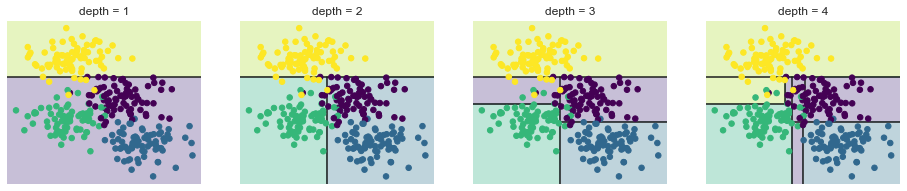

In [49]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))
    print("Mean classification accuracy =", model.score(X,y))

After the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch. Except for nodes that contain all of one color, at each level every region is again split along one of the two features.

#### Training two trees on different halfs of the data: 

C:\Users\gorja\Google Drive\Fakultet\ASI\MU\Kod\8 - Ensemble Methods\helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)
C:\Users\gorja\Google Drive\Fakultet\ASI\MU\Kod\8 - Ensemble Methods\helpers_05_08.py:34: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)


Mean classification accuracy = 1.0
Mean classification accuracy = 1.0


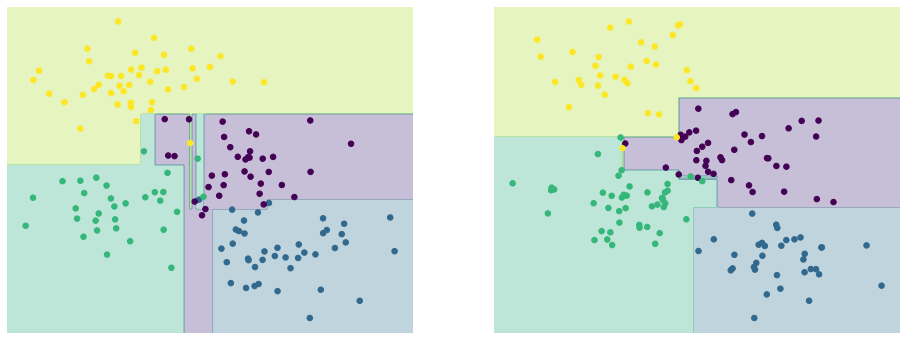

In [50]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0]) # tree 1 only trains on even-numbered data points
print("Mean classification accuracy =", model.score(X[::2],y[::2]))
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1]) # tree 2 only trains on odd-numbered data points
print("Mean classification accuracy =", model.score(X[1::2],y[1::2]))

It is clear that in some places the two trees produce consistent results (in the four corners), while in other places they give very different classifications (e.g., in the regions between any two clusters). The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees we might come up with a better result.

Just as using information from two trees improves our results, we might expect that using information from many trees would improve our results even further.

#### Creating a bagging random forest with 100 trees via sklearn's Bagging methods: 

Mean classification accuracy = 0.9966666666666667


C:\Users\gorja\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'clim'


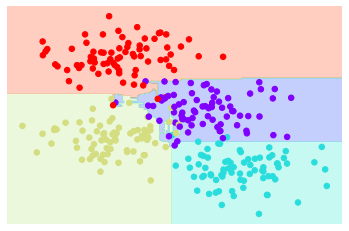

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) # fitting each tree with a random data subset of 80% 

bag.fit(X, y)
visualize_classifier(bag, X, y)
print("Mean classification accuracy =", bag.score(X,y))

In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features. 

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator, which takes care of all the randomization automatically.

#### Creating a bagging random forest with 100 trees via sklearn's Random Forest method: 

Mean classification accuracy = 1.0


C:\Users\gorja\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'clim'


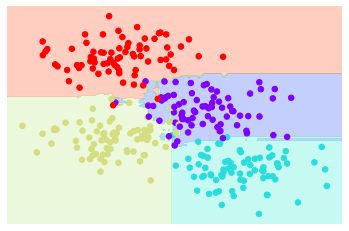

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);
print("Mean classification accuracy =", model.score(X,y))